# Predicting the sale price of bulldozers sold at auctions.

## Data preperation

This notebook is dedicated to Exploratory data analysis, Data Cleaning and Data preprocessing. In this notebook I will prepare the training and validation data that can be used to train the machine learning model efficiently

In [1]:
### This cell contains all the tools we will be using
import numpy as np
import pandas as pd

### Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Preporcessing tools
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

## Reading the Data
Let's Import the data and start working with it.

In [2]:
### Reading the Train and valid data csv
df = pd.read_csv('./bluebook-for-bulldozers-data/TrainAndValid.csv',
                       low_memory=False)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

The dataset contains a variety of data types. Furthermore, there are numerous features with null values. To create an efficient Machine Learning model with the data, the data needs to be cleaned and preprocessed

In the next few steps I will perform 
* Exploratory data analysis
* Data Cleaning
* Feature Encoding
* Feature Engineering 

in order to prepare the data for Machine Learning Model.

## Exploratory Data Analysis
Let's explore the data and it's features to get a better understanding of the data.

**One of the most important feature of this dataset is sale date so let's explore it further**

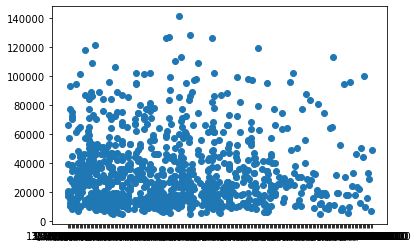

In [5]:
### plot sale date with sale price
plt.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

In [6]:
### View first 10 sale date
df['saledate'][:10]

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
5    12/18/2008 0:00
6     8/26/2004 0:00
7    11/17/2005 0:00
8     8/27/2009 0:00
9      8/9/2007 0:00
Name: saledate, dtype: object

As we see here the data is in format of object and to make these dates useful to training our machine learning model we need to convert these into date format. 

### Parsing Dates
* One way of doing this is either using `parse_date` attribute while importing out data/csv.
* Another way is to use `to_datetime` method in pandas module. We can do that by telling pandas the column which contains dates by using `parse_date` parameter.

In [3]:
### Converting object type date to datetime
df['saledate'] = pd.to_datetime(df['saledate'])

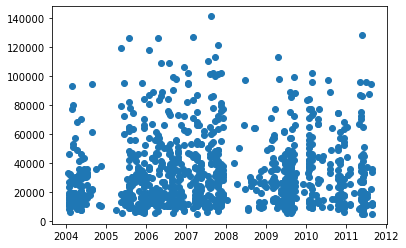

In [8]:
### Plotting date with sale after processing saledate
plt.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

We can see the difference after converting the dates from object to datetime. Data points are now seperated wrt years.

In [9]:
df['saledate'].head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sorting DataFrame
As the most important feature for price prediction is sale date and now that we have transformed our date we can sort our data by dates for better representation of data.

In [4]:
df.sort_values(by = 'saledate',ascending = True,inplace=True)

In [11]:
df['saledate'].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

**Copy of original Dataframe**

Creating a copy of the original dataframe so that we have an option to revert back to original data, if needed, after performing feature Engineering.

In [5]:
df_cp = df.copy()

In [13]:
df_cp['saledate'].head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Cleaning Data

There are large amount of Nan values present in our dataset. Machine learning models cannot work with null values so I need to clean our data.

Firstly, let's see a sample of all object type data.

In [14]:
### Displaying values from columns which contains null values
for col in df_cp.columns:
    if df_cp[col].dtypes == object:
        if df_cp[col].isna().sum() > 0:
            print('\n')
            print(col)
            ### Print dinstinct value counts
            val = df_cp[col].value_counts()
            print(val)



UsageBand
UsageBand
Medium    35832
Low       25311
High      12527
Name: count, dtype: int64


fiSecondaryDesc
fiSecondaryDesc
C         44431
B         40165
G         37915
H         24729
E         21532
          ...  
BLGPPS        1
MSR           1
LC7A          1
CL            1
BH            1
Name: count, Length: 177, dtype: int64


fiModelSeries
fiModelSeries
II      13770
LC       9175
III      5351
-1       4646
-2       4033
        ...  
LL          1
6F          1
-2LC        1
-5A         1
VII         1
Name: count, Length: 123, dtype: int64


fiModelDescriptor
fiModelDescriptor
L            16464
LGP          16143
LC           13295
XL            6700
6             2944
             ...  
K5               1
HighLift         1
High Lift        1
III              1
SL               1
Name: count, Length: 140, dtype: int64


ProductSize
ProductSize
Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396


From above sample it can be observed that there is a 'None or Unspecified' value present in various columns. So, let's convert them to Null values.

In [6]:
### Changing 'None or Unspecified' to None
for col in df_cp.columns:
    df_cp[col].mask(df_cp[col] == 'None or Unspecified',None,inplace=True)

In [16]:
### Checking the column value counts again
for col in df_cp.columns:
    if df_cp[col].dtypes == object:
        if df_cp[col].isna().sum() > 0:
            print('\n')
            print(col)
            val = df_cp[col].value_counts()
            print(val)



UsageBand
UsageBand
Medium    35832
Low       25311
High      12527
Name: count, dtype: int64


fiSecondaryDesc
fiSecondaryDesc
C         44431
B         40165
G         37915
H         24729
E         21532
          ...  
BLGPPS        1
MSR           1
LC7A          1
CL            1
BH            1
Name: count, Length: 177, dtype: int64


fiModelSeries
fiModelSeries
II      13770
LC       9175
III      5351
-1       4646
-2       4033
        ...  
LL          1
6F          1
-2LC        1
-5A         1
VII         1
Name: count, Length: 123, dtype: int64


fiModelDescriptor
fiModelDescriptor
L            16464
LGP          16143
LC           13295
XL            6700
6             2944
             ...  
K5               1
HighLift         1
High Lift        1
III              1
SL               1
Name: count, Length: 140, dtype: int64


ProductSize
ProductSize
Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396


Let's check the percentage of null values present in each columns to understant and decide the approach to handle the missing data.

In [17]:
### Display the percentage of null values present in each column
df_cp.isna().sum()*100/len(df)

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
saledate                     0.000000
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.081415
Forks                       96.449220
Pad_Type                    97.891679
Ride_Control                78.668421
Stick                       80.349796
Transmission

We have a lot of columns with more than 50% null values. These features will reduce the accuracy of prediction. So, the best solution is to drop these columns

In [7]:
### Setting the benchmark to drop columns with more than 65% null values
### Creating a list of all the columns that are dropped to duplicate it in the test data.
droped_col = []
for col in df_cp.columns:
    if df_cp[col].isna().sum()*100/len(df_cp) > 65:
        droped_col.append(col)
        df_cp.drop(col,axis = 1,inplace = True)

In [19]:
# df_cp.isna().sum()*100/len(df_cp)
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   saledate                  412698 non-null  datetime64[ns]
 9   fiModelDesc               412698 non-null  object        
 10  fiBaseModel               412698 non-null  object        
 11  fiSecondaryDesc           271971 non-null  object        
 12  Pr

### Handling Missing Values in Numerical columns

In [20]:
df_cp['auctioneerID'].value_counts()

auctioneerID
1.0     192773
2.0      57441
3.0      30288
4.0      20877
99.0     12042
6.0      11950
7.0       7847
8.0       7419
5.0       7002
10.0      5876
9.0       4764
11.0      3823
12.0      3610
13.0      3068
18.0      2359
14.0      2277
20.0      2238
19.0      2074
16.0      1807
15.0      1742
21.0      1601
22.0      1429
24.0      1357
23.0      1322
17.0      1275
27.0      1150
25.0       959
28.0       860
26.0       796
0.0        536
Name: count, dtype: int64

Since, auctioneerID is only missing 4% value imputing the missing value will not create a bias. Thus, the way to handle auctioneerID will be to impute it with near by values.

In [8]:
### back filling null values
df_cp['auctioneerID'].bfill(axis=0,inplace=True)

In [22]:
df_cp['auctioneerID'].isna().sum()

0

In [9]:
df['MachineHoursCurrentMeter'].describe()

count    1.475040e+05
mean     3.522988e+03
std      2.716993e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.209000e+03
max      2.483300e+06
Name: MachineHoursCurrentMeter, dtype: float64

<AxesSubplot:xlabel='MachineHoursCurrentMeter'>

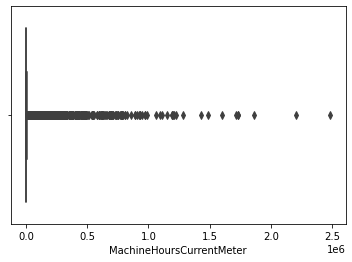

In [24]:
sns.boxplot(x = df_cp['MachineHoursCurrentMeter'])

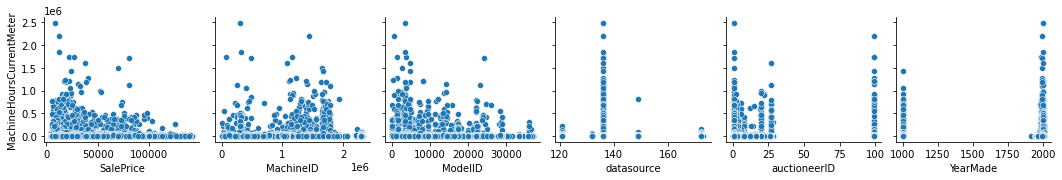

In [25]:
sns.pairplot(df_cp,x_vars = df_cp.columns[1:7],y_vars=df_cp.columns[7])

In [26]:
corr_val = df_cp[['SalesID','MachineID','SalePrice','ModelID','datasource',
                  'auctioneerID','YearMade','MachineHoursCurrentMeter']].corr()

<AxesSubplot:>

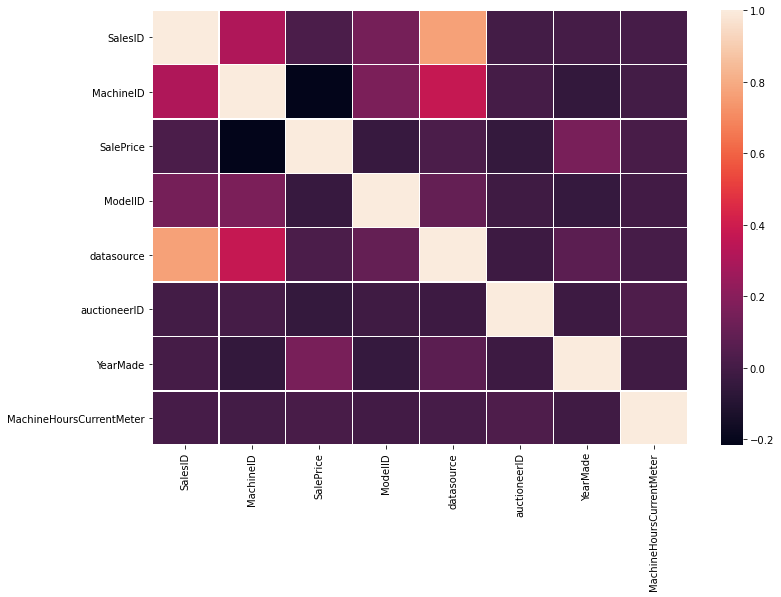

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_val,linewidths=.5)

There is no strong correlation of MachineHoursCurrentMeter with any other numeric data. Furthermore, there are a lot of outliers in the data present. Thus, we are filling values with median since it is least sensitive to ourliers, compared to mean.

In [10]:
df_cp['MachineHoursCurrentMeter'].fillna(round(df['MachineHoursCurrentMeter'].mean(),2)
                                         ,inplace=True)

### Handling Missing Values in non-Numerical columns

Check the non-numeric column with their null value percentage 

In [29]:
for col in df_cp.columns:
    if df_cp[col].dtypes == object:
        null_val = df_cp[col].isna().sum()*100/len(df_cp)
        if null_val > 0:
            print(col,' ', null_val)

fiSecondaryDesc   34.09926871465333
ProductSize   52.48511017741787
Enclosure   0.08141546603085065
Transmission   60.23290638675254
Hydraulics   20.008577700885393


In [30]:
df_cp['Enclosure'].value_counts()

Enclosure
OROPS         177971
EROPS         141769
EROPS w AC     92601
EROPS AC          18
NO ROPS            3
Name: count, dtype: int64

In [11]:
### Filling with absence value i.e No ROPS
df_cp['Enclosure'].fillna('NO ROPS',inplace=True)

In [32]:
df_cp['Transmission'].value_counts()

Transmission
Standard        143915
Powershift       11991
Powershuttle      4286
Hydrostatic       3342
Direct Drive       422
Autoshift          118
AutoShift           44
Name: count, dtype: int64

In [12]:
### Combining same value with different naming convention
df_cp['Transmission'].mask(df_cp['Transmission'] == 'AutoShift','Autoshift',inplace = True)

In [13]:
### Filling with the high frequency value
df_cp['Transmission'].fillna('Standard',inplace=True)

In [35]:
df_cp['Hydraulics'].value_counts()

Hydraulics
2 Valve              145317
Standard             106515
Auxiliary             43224
Base + 1 Function     25511
3 Valve                5807
4 Valve                3077
Base + 3 Function       311
Base + 2 Function       132
Base + 5 Function        94
Base + 4 Function        81
Base + 6 Function        54
Name: count, dtype: int64

In [14]:
### Filling with the high frequency value
df_cp['Hydraulics'].fillna(method='ffill',inplace=True)

In [37]:
df_cp[['ProductSize','ProductGroup','ProductGroupDesc']]

,ProductSize,ProductGroup,ProductGroupDesc
205615,Medium,TTT,Track Type Tractors
274835,NaN,WL,Wheel Loader
141296,Large,TTT,Track Type Tractors
212552,NaN,WL,Wheel Loader
62755,NaN,TTT,Track Type Tractors
...,...,...,...
410879,NaN,TTT,Track Type Tractors
412476,NaN,SSL,Skid Steer Loaders
411927,Mini,TEX,Track Excavators
407124,NaN,MG,Motor Graders


Here it can be observed that Product Group Description is a redundant column. So, I will drop it.

Let's first explore the relation between `ProductSize`, `ProductGroup`, and `SalePrice`. This will help me to impute data.

/Users/Anushka/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProductSize', ylabel='SalePrice'>

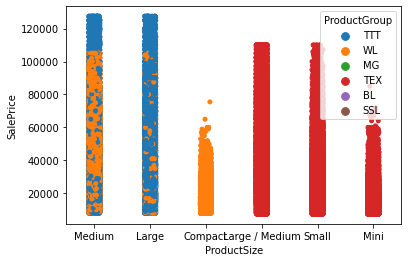

In [38]:
sns.stripplot(df_cp['ProductSize'],y = df_cp['SalePrice'],hue=df_cp['ProductGroup'])

/Users/Anushka/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProductGroup', ylabel='SalePrice'>

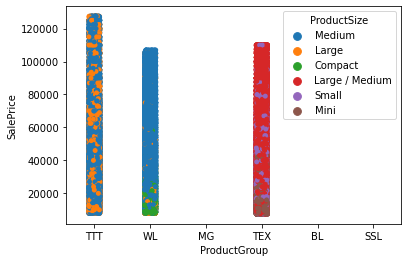

In [39]:
sns.stripplot(df_cp['ProductGroup'],y = df_cp['SalePrice'],hue=df_cp['ProductSize'])

The above two plot indicate that `TTT` and `WL` have majority **medium** size product. Whereas, `TEX` has Majority of **Large/Medium** sized product. So we will impute the missing value based on the mode of the product group.

In [15]:
df_cp[df_cp['ProductGroup']=='TTT']['ProductSize'].fillna('Medium',inplace = True)
df_cp[df_cp['ProductGroup']=='WL']['ProductSize'].fillna('Medium',inplace = True)
df_cp[df_cp['ProductGroup']=='TEX']['ProductSize'].fillna('Large / Medium',inplace = True)

<ipython-input-15-ce9992700b86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp[df_cp['ProductGroup']=='TTT']['ProductSize'].fillna('Medium',inplace = True)
<ipython-input-15-ce9992700b86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp[df_cp['ProductGroup']=='WL']['ProductSize'].fillna('Medium',inplace = True)
<ipython-input-15-ce9992700b86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp[df_cp['ProductGroup']=='T

In [16]:
### Filling the remaining value with the highest frequency value
df_cp['ProductSize'].fillna('Medium',inplace = True)

In [42]:
df_cp[['fiModelDesc','fiBaseModel','fiSecondaryDesc']][:15]

,fiModelDesc,fiBaseModel,fiSecondaryDesc
205615,TD20,TD20,NaN
274835,A66,A66,NaN
141296,D7G,D7,G
212552,A62,A62,NaN
62755,D3B,D3,B
54653,D6C,D6,C
81383,IT12,IT12,NaN
204924,544,544,NaN
135376,D5HII,D5,H
113390,12F,12,F


In [43]:
df_cp['fiSecondaryDesc'].value_counts()

fiSecondaryDesc
C         44431
B         40165
G         37915
H         24729
E         21532
          ...  
BLGPPS        1
MSR           1
LC7A          1
CL            1
BH            1
Name: count, Length: 177, dtype: int64

Since the null values in 'fiSecondaryDesc' are not missing but are related to the fiModelDesc feature. Imputing it with some value is not the ideal solution. To handle the Null values we will first convert the column to categorical value and the set the Null values with 0.


fiModelDesc and ProductGroupDesc are redundant columns thus. Dropping them will be a ideal.

In [17]:
### Adding the columns to the list of dropped columns
droped_col.extend(['fiModelDesc','ProductGroupDesc'])

### Dropping the columns
df_cp.drop(['fiModelDesc','ProductGroupDesc'],axis = 1, inplace =True)

## Feature Encoding
Since, Machine Learning modules cannot process string type data, we need to convert them into data types, that can be processed by them.
Now, we are going to convert all string type data into numeric form using various method depending on the attribute.

In [45]:
### Value counts of object type features
for col in df_cp.columns:
    if df_cp[col].dtypes == object:
        print(col)
        print(df_cp[col].value_counts())

fiBaseModel
fiBaseModel
580      20179
310      17886
D6       13527
416      12900
D5        9636
         ...  
56           1
B4230        1
IS30         1
MM555        1
WLK15        1
Name: count, Length: 1961, dtype: int64
fiSecondaryDesc
fiSecondaryDesc
C         44431
B         40165
G         37915
H         24729
E         21532
          ...  
BLGPPS        1
MSR           1
LC7A          1
CL            1
BH            1
Name: count, Length: 177, dtype: int64
ProductSize
ProductSize
Medium            280947
Large / Medium     51297
Small              27057
Mini               25721
Large              21396
Compact             6280
Name: count, dtype: int64
fiProductClassDesc
fiProductClassDesc
Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth             57542
Track Type Tractor, Dozer - 20.0 to 75.0 Horsepower                 18131
Wheel Loader - 150.0 to 175.0 Horsepower                            15537
Track Type Tractor, Dozer - 85.0 to 105.0 Horsepower            

### Binning features with >15 cardinality 

Binning features with >15 and <100 cardinality will reduce the number of unique values in the column. This will reduce the number of encoded columns in the dataset.

In [18]:
## Define function for grouping state into categories
def bin_state(state):
    
    # check if Northeast state
    if state in ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire','Rhode Island', 'Vermont',
                'New Jersey','New York', 'Pennsylvania']:
        return 'Northeast'
    
    # check if Southern state
    elif state in ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia',
                    'Washington DC', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi',
                    'Tennessee','Arkansas', 'Louisiana', 'Oklahoma', 'Texas']:
        return 'South'
    # check if Midwest state
    elif state in ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 
                   'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']:
        return 'Midwest'
    # check if Western state
    elif state in ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah',
                   'Wyoming' , 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']:
        return 'West'
    
    # Remaining are categorised as other
    else:
        return 'Other'

In [19]:
### Binning the states using the above function
df_cp['region'] = df_cp['state'].apply(bin_state)
df_cp.drop('state',axis =1, inplace = True)

### Ordinal Encoding

Let's check features with cardinality <=6 if they have any order(trend) with sale price

/Users/Anushka/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Enclosure', ylabel='SalePrice'>

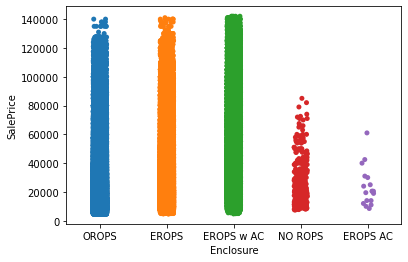

In [48]:
sns.stripplot(df_cp['Enclosure'],y = df_cp['SalePrice'])

/Users/Anushka/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='SalePrice'>

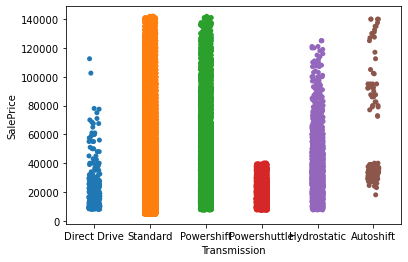

In [49]:
sns.stripplot(df_cp['Transmission'],y = df_cp['SalePrice'])

/Users/Anushka/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProductSize', ylabel='SalePrice'>

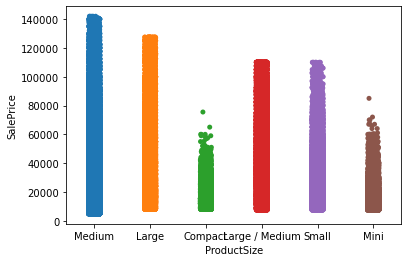

In [50]:
sns.stripplot(df_cp['ProductSize'],y = df_cp['SalePrice'])

Encoding the `ProductSize`, `Enclosure`, and `Transmission` column with ordinal encoding to maintain the independent order of the values.

In [20]:
### Creating a encoding order grid according the trends witnessed with salePrice in the above plots 
encoding_order = {'ProductSize':[['Medium','Large','Large / Medium','Small','Mini','Compact']],
            'Enclosure':[['EROPS w AC','EROPS','OROPS','NO ROPS','EROPS AC']],
            'Transmission':[['Powershift','Standard','Autoshift','Hydrostatic','Direct Drive','Powershuttle']]}

In [21]:
for key, value in encoding_order.items():
    ### Using Ordinal Encoder class
    o_enc = OrdinalEncoder(categories=value)
    ### Using Fit-transform to simultaneously fit the data and transfrom it
    df_cp[key + '_Enc'] = o_enc.fit_transform(df_cp[[key]])
    ### Dropping the original  column post encoding
    df_cp.drop(key,axis = 1,inplace = True)

In [53]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              412698 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  412698 non-null  float64       
 8   saledate                  412698 non-null  datetime64[ns]
 9   fiBaseModel               412698 non-null  object        
 10  fiSecondaryDesc           271971 non-null  object        
 11  fiProductClassDesc        412698 non-null  object        
 12  Pr

### Binary Encoding

Since, there is not trend observed between Hydraluics and sale price I will use a nominal encoding technique. I am using Binary encoding technique because the cardinality is = 11. Binary encoding will reduce the number of features added to the data frame compared to one-hot or dummy encoding. 

In [22]:
### Using Sklearn's Binary Encoder
bi_enc = ce.BinaryEncoder(df_cp['Hydraulics'])
### Using Fit-transform to simultaneously fit the data and transfrom it
enc = bi_enc.fit_transform(df_cp['Hydraulics'])
enc

,Hydraulics_0,Hydraulics_1,Hydraulics_2,Hydraulics_3
205615,0,0,0,1
274835,0,0,0,1
141296,0,0,0,1
212552,0,0,0,1
62755,0,0,0,1
...,...,...,...,...
410879,0,0,0,1
412476,0,1,0,1
411927,0,1,0,1
407124,0,0,1,0


In [23]:
### Combining the encoded values with the original dataframe
df_cp = pd.concat([df_cp,enc],axis = 1)

### Dropping the original column
df_cp.drop('Hydraulics',axis=1,inplace=True)

### Dummy Encoding

In [24]:
### Dummy encoding for the features with cardinality <10 and no indivisual order
dummy_enc = pd.get_dummies(data = df_cp[['region','ProductGroup']],
                           drop_first=True,columns=['region','ProductGroup'],
                           dtype=float)
dummy_enc

,region_Northeast,region_Other,region_South,region_West,ProductGroup_MG,ProductGroup_SSL,ProductGroup_TEX,ProductGroup_TTT,ProductGroup_WL
205615,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
274835,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
141296,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
212552,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
62755,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
410879,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
412476,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
411927,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
407124,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [25]:
df_cp = pd.concat([df_cp,dummy_enc],axis = 1)

In [26]:
df_cp.drop(['region','ProductGroup'],axis=1,inplace = True)

### Using astype for conversion

Using Astype convertion for features with >100 cardinality.

More info regarding astype:
https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [27]:
### Turning string values into catagory using astype method.
for column, value in df_cp.items():
    if df_cp[column].dtypes == object:
        df_cp[column] = value.astype('category')

When we convert string to categories pandas under the hood assign codes to all the categories. If there is a missing value a code of -1 is assigned to it. So here we will just increment the codes assigned to each catagory by 1. Thus we will not have any missing value.

In [28]:
pd.Categorical(df_cp['fiSecondaryDesc']).codes

array([-1, -1, 58, ..., 58, 58, 60], dtype=int16)

In [29]:
### Check for labels that are catagorical
for column, value in df_cp.items():
    if pd.api.types.is_categorical_dtype(value):
        ### Incrementing codes by 1 to fill the missing values
        df_cp[column] =  pd.Categorical(value).codes + 1

In [62]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              412698 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  412698 non-null  float64       
 8   saledate                  412698 non-null  datetime64[ns]
 9   fiBaseModel               412698 non-null  int16         
 10  fiSecondaryDesc           412698 non-null  int16         
 11  fiProductClassDesc        412698 non-null  int8          
 12  Pr

## Feature Engineering
Let's work on the features of our data to make it more suitable for training our machine learning model.

### Adding datetime parameter
First, we are going to extract various properties, like date, month, year etc. from out sale date column. 

In [30]:
## Add datetime parameter for saledate.
df_cp['day'] = df_cp.saledate.dt.day
df_cp['month'] = df_cp.saledate.dt.month
df_cp['year'] = df_cp.saledate.dt.year
df_cp['DayOfWeek'] = df_cp.saledate.dt.day_of_week
df_cp['StartOfMonth'] = df_cp.saledate.dt.is_month_start
df_cp['EndOfYear'] = df_cp.saledate.dt.is_year_end

In [64]:
df_cp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00
fiBaseModel,1744,559,713,558,683


In [31]:
### Droping saledate column since we no longer need it as it will be redundant data
df_cp.drop('saledate',axis = 1,inplace = True)

### Weird Data

In [66]:
df_cp['YearMade'].value_counts().sort_index()[:20]

YearMade
1000    39391
1919      127
1920       17
1937        1
1942        1
1947        1
1948        3
1949        1
1950        8
1951        7
1952        6
1953        7
1954        3
1955        5
1956       20
1957       16
1958       25
1959       28
1960       97
1961       99
Name: count, dtype: int64

Text(0.5, 1.0, 'Year Made')

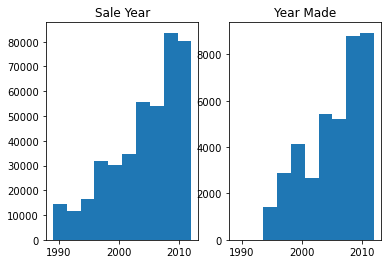

In [67]:
# plt.scatter(df_cp['SalePrice'],df_cp['YearMade'])
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(df_cp['year'])
ax1.set_title('Sale Year')
ax2.hist(df_cp[df_cp['YearMade'] == 1000]['year'])
ax2.set_title('Year Made')

There are few items with Yearmade as 1000. To handle these outlier and inaccurate values, I referenced the year first bulldozer was made and changed the year made for the item to earliest year available in the data post the invention year. 

According to wikipedia first bulldozer was invented in 1925. So, I changed the year 1000,1919,1920 to 1937 i.e. the earliest year present in our data, post the invention year.

In [32]:
df_cp['YearMade'].mask(df_cp['YearMade'] == 1000,1937,inplace=True)
df_cp['YearMade'].mask(df_cp['YearMade'] == 1919,1937,inplace=True)
df_cp['YearMade'].mask(df_cp['YearMade'] == 1920,1937,inplace=True)

In [33]:
df_cp.YearMade.value_counts()

YearMade
1937    39536
2005    22096
1998    21751
2004    20914
1999    19274
        ...  
1949        1
1947        1
2012        1
1942        1
2013        1
Name: count, Length: 70, dtype: int64

In [34]:
### Saving out clean test_valid date as a json
df_cp.to_csv('Processed Data/TrainValid_Clean.csv',index=False)